# "Visualising Vehicle Routing Problem Solutions in Python"
> "Visualise paths of the multi-depot split-delivery vehicle routing problem with inventory constraints and heterogeneous fleet."
- toc: false
- badges: true
- comments: true
- categories: [Operations Research, Python]
- hide: true

In [1]:
#hide
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

from collections import defaultdict

mpl.rcParams['figure.dpi'] = 250

Visualising results is of major importance for any researcher and practicer. In this article I will show how we can visualise solutions for a particular vehicle routing problem in *Python* using *matplotlib*. Before, showing you how this visualisation is done, I first discuss the problem in more detail. The next two section contain a extensive problem definition and a discussion of our solution approach. After, an explanation of the in and output format of the problem is dicussed. Lastly, the code for visualising solutions is provided.

## Problem Definition

Consider the problem of dispatching and scheduling vehicles from multiple depots to serve and deliver goods to clients at different locations. One application is supplying products to supermarkets, i.e. clients, from a number of distribution centres. A client can be served by more than one vehicle, for example, if the client demands a large quantity or if the vehicle capacity is small. Serving a customer requires a given service time, which corresponds to activities such as handling and unloading goods from the vehicle. At each depot, different types of vehicles are available, which differ in speed and travel costs. As an example, think of trucks that vary in size and fuel type. The use of vehicles comes at a cost, corresponding to fuel expenditures and driver wages. The objective is to minimize total costs, while serving all customers and taking into account restrictions such as travel time regulations and inventory constraints.

The main characteristics of the problem are the inclusion of multiple depots and the option to split client deliveries. Applications of this problem include waste collection in large cities, multi-warehouse distribution systems, and disaster relief logistics.

## Solution Approach

For a course, [Niels van der Laan](https://www.rug.nl/staff/n.van.der.laan/research) and I developed a meta-heuristic approach for this problem. The implementation can be found [here](https://github.com/markkvdb/MDSDHVRP-Solver). The meta-heuristic approach is an extension of the sequential large-neighbourhood search algorithm by [HemmelMayr (2015)](https://www.sciencedirect.com/science/article/pii/S0377221714009473). More information about the implementation and results of our meta-heuristic can be found in the [report](https://github.com/markkvdb/MDSDHVRP-Solver/blob/master/MDSDHVRP-I.pdf).

An overview of the main algorithm is given below.

![](images/LNS_algorithm.png)


## Input and Output Files

The explanation below can also be found in the `README` of the github repository.

### Input file 

Now that we have build our solver we can use by providing a file with our problem instance. The input file should be defined according to the following scheme

```txt
2 2 30

   0   200     8    80    25
   1    50     8   110    10

   0   57.84   50.38  203    1    1
   1  -84.84  -39.79  160    5    1

   0  -64.35  -90.76    8  0.05
   1    6.77  -84.59    5  0.09
   2  -58.57   14.63   15  0.04
   3   59.16   89.24    5  0.09
   4   46.49   77.78   23  0.08
   5   55.12   81.50   19  0.05
   6   59.28   89.63    4  0.09
   7   51.71   54.42   24  0.06
   8   10.22   56.17   21  0.07
   9   27.20  -83.00   19  0.09
  10  -20.87   63.39    5  0.07
  11    3.21  -68.39    4  0.03
  12   27.90  -61.73    1  0.03
  13   63.60  -25.71   15  0.03
  14   32.38  -49.92    8  0.04
  15   23.90  -75.21   13  0.02
  16  -94.52   39.39   23  0.02
  17  -97.87  -47.92    8  0.06
  18  -73.88  -47.22    7  0.05
  19  -86.10    5.76   17  0.04
  20  -69.45    5.35    5  0.05
  21   -9.02   95.03    4  0.02
  22    0.87   -7.88   24  0.09
  23  -97.95   29.66   15  0.03
  24  -78.38  -14.60    4  0.02
  25  -19.18  -66.77    6  0.07
  26  -13.62  -76.94    7  0.01
  27  -47.75  -26.75    2  0.04
  28  -55.08  -20.71    1  0.01
  29   46.03  -22.40    1  0.02
```

The first line specifies the number of different vehicles, depots and customers, respectively.

```txt
2 2 30
```

 The second part defines the vehicle number, capacity, maximum duration of trip, speed and cost per unit of distance.

```txt
   0   200     8    80    25
   1    50     8   110    10
```

The third part defines the depot id, x-coordinate, y-coordinate, total capacity of items, number of vehicles of type 1 and the number of vehicles of type 2.

```txt
   0   57.84   50.38  203    1    1
   1  -84.84  -39.79  160    5    1
```

Note that if we have more vehicle types, then the lines above will be extended as needed. The last part concerns the customers. The numbers on the rows are: id, x-coordinate, y-coordinate, items demanded and the processing time.

```txt
   0  -64.35  -90.76    8  0.05
   1    6.77  -84.59    5  0.09
   2  -58.57   14.63   15  0.04
   3   59.16   89.24    5  0.09
   4   46.49   77.78   23  0.08
   5   55.12   81.50   19  0.05
   6   59.28   89.63    4  0.09
   7   51.71   54.42   24  0.06
   8   10.22   56.17   21  0.07
   9   27.20  -83.00   19  0.09
  10  -20.87   63.39    5  0.07
  11    3.21  -68.39    4  0.03
  12   27.90  -61.73    1  0.03
  13   63.60  -25.71   15  0.03
  14   32.38  -49.92    8  0.04
  15   23.90  -75.21   13  0.02
  16  -94.52   39.39   23  0.02
  17  -97.87  -47.92    8  0.06
  18  -73.88  -47.22    7  0.05
  19  -86.10    5.76   17  0.04
  20  -69.45    5.35    5  0.05
  21   -9.02   95.03    4  0.02
  22    0.87   -7.88   24  0.09
  23  -97.95   29.66   15  0.03
  24  -78.38  -14.60    4  0.02
  25  -19.18  -66.77    6  0.07
  26  -13.62  -76.94    7  0.01
  27  -47.75  -26.75    2  0.04
  28  -55.08  -20.71    1  0.01
  29   46.03  -22.40    1  0.02
```

Example input files can be found in the `src/data` folder.

### Output file

The output file of the input file in the example looks as follows

```txt
58119.35

0 0     595.22  14880.60 103  0.55  7.44  7.99  0 8 1 5 2 15 3 5 4 23 5 19 6 4 7 24
0 1     617.83   6178.27  50  0.29  5.62  5.91  8 21 9 19 10 5 11 4 12 1
1 0     610.17  15254.28  96  0.31  7.63  7.94  13 15 14 8 15 13 16 23 17 8 18 7 19 17 20 5
1 0     608.21  15205.18  63  0.29  7.60  7.89  21 4 22 24 23 15 24 4 25 6 26 7 27 2 28 1
1 0     264.04   6601.02   1  0.02  3.30  3.32  29 1
1 0       0.00      0.00   0  0.00  0.00  0.00  
1 0       0.00      0.00   0  0.00  0.00  0.00  
1 1       0.00      0.00   0  0.00  0.00  0.00  
```

The first lines gives the total objective function which is the sum of the cost of all trips by the vehicles while satisfying all demand. The following lines have the following structure

```txt
<depot id> <vehicle type> <...> <...> <total quantity> <service time> <travel time> <total time> <customer id 1> <quantity customer id 1> <customer id 2> <quantity customer id 2> <...>
```

## Import routing problem

Below you find the python implementation of how to import the input file into python objects.

In [2]:
def import_instance_input(fn):
    depots = []
    customers = []

    with open(fn) as f:
        data = f.readlines()
        curr_line = 0

        # first line contains number of depots, types of vehicles and number of customers
        problem_info = data[curr_line].split()
        n_type_vehicles = int(problem_info[0])
        n_depots = int(problem_info[1])
        n_customers = int(problem_info[2])

        # process vehicle information
        curr_line = 2
        for idx in range(0, n_type_vehicles):
            curr_line += 1

        # skip empty line
        curr_line += 1

        # process depots
        for idx in range(0, n_depots):
            depot_info = data[curr_line].split()
            depots.append({
                'id': int(depot_info[0]),
                'x_coord': float(depot_info[1]),
                'y_coord': float(depot_info[2]),
                'capacity': int(depot_info[3])
            })

            curr_line += 1

        # skip empty line
        curr_line += 1

        # process customers
        for idx in range(0, n_customers):
            customer_info = data[curr_line].split()
            customers.append({
                'id': int(customer_info[0]),
                'x_coord': float(customer_info[1]),
                'y_coord': float(customer_info[2]),
                'demand': int(customer_info[3]),
                'processing_time': float(customer_info[4])
            })

            curr_line += 1
    
    return (depots, customers)

In [3]:
depots, customers = import_instance_input("data/instanceB_52_input.txt")

## Import solution

In [4]:
def import_instance_output(fn):
    trips = []
    with open(fn) as f:
        data = f.readlines()

        # first line contains objective value
        obj_val = float(data[0])

        # first empty line and then all trips
        for line_idx in range(2, len(data)):
            line = data[line_idx].split()

            # if vehicle goes on trip, add customers
            customers = []
            customer_idx = 8
            while customer_idx < len(line):
                customers.append({
                    'id': int(line[customer_idx]),
                    'load': int(line[customer_idx+1])
                })
                customer_idx += 2

            trips.append({
                'depot_id': int(line[0]),
                'vehicle_type': int(line[1]),
                'travel_cost': float(line[2]),
                'total_cost': float(line[3]),
                'load': int(line[4]),
                'processing_time': float(line[5]),
                'travel_time': float(line[6]),
                'total_time': float(line[7]),
                'customers': customers
            })
            
    return trips

In [5]:
trips = import_instance_output("data/instanceB_52_output.txt")

## Plot solution

To plot the solution, we first visualise the depots and customers on the map. After, we add all the routes given in the solution file.

However, we first start with an empty canvas to display all of this.

Text(0.5, 1.0, 'MDSDHVRP-I Solution')

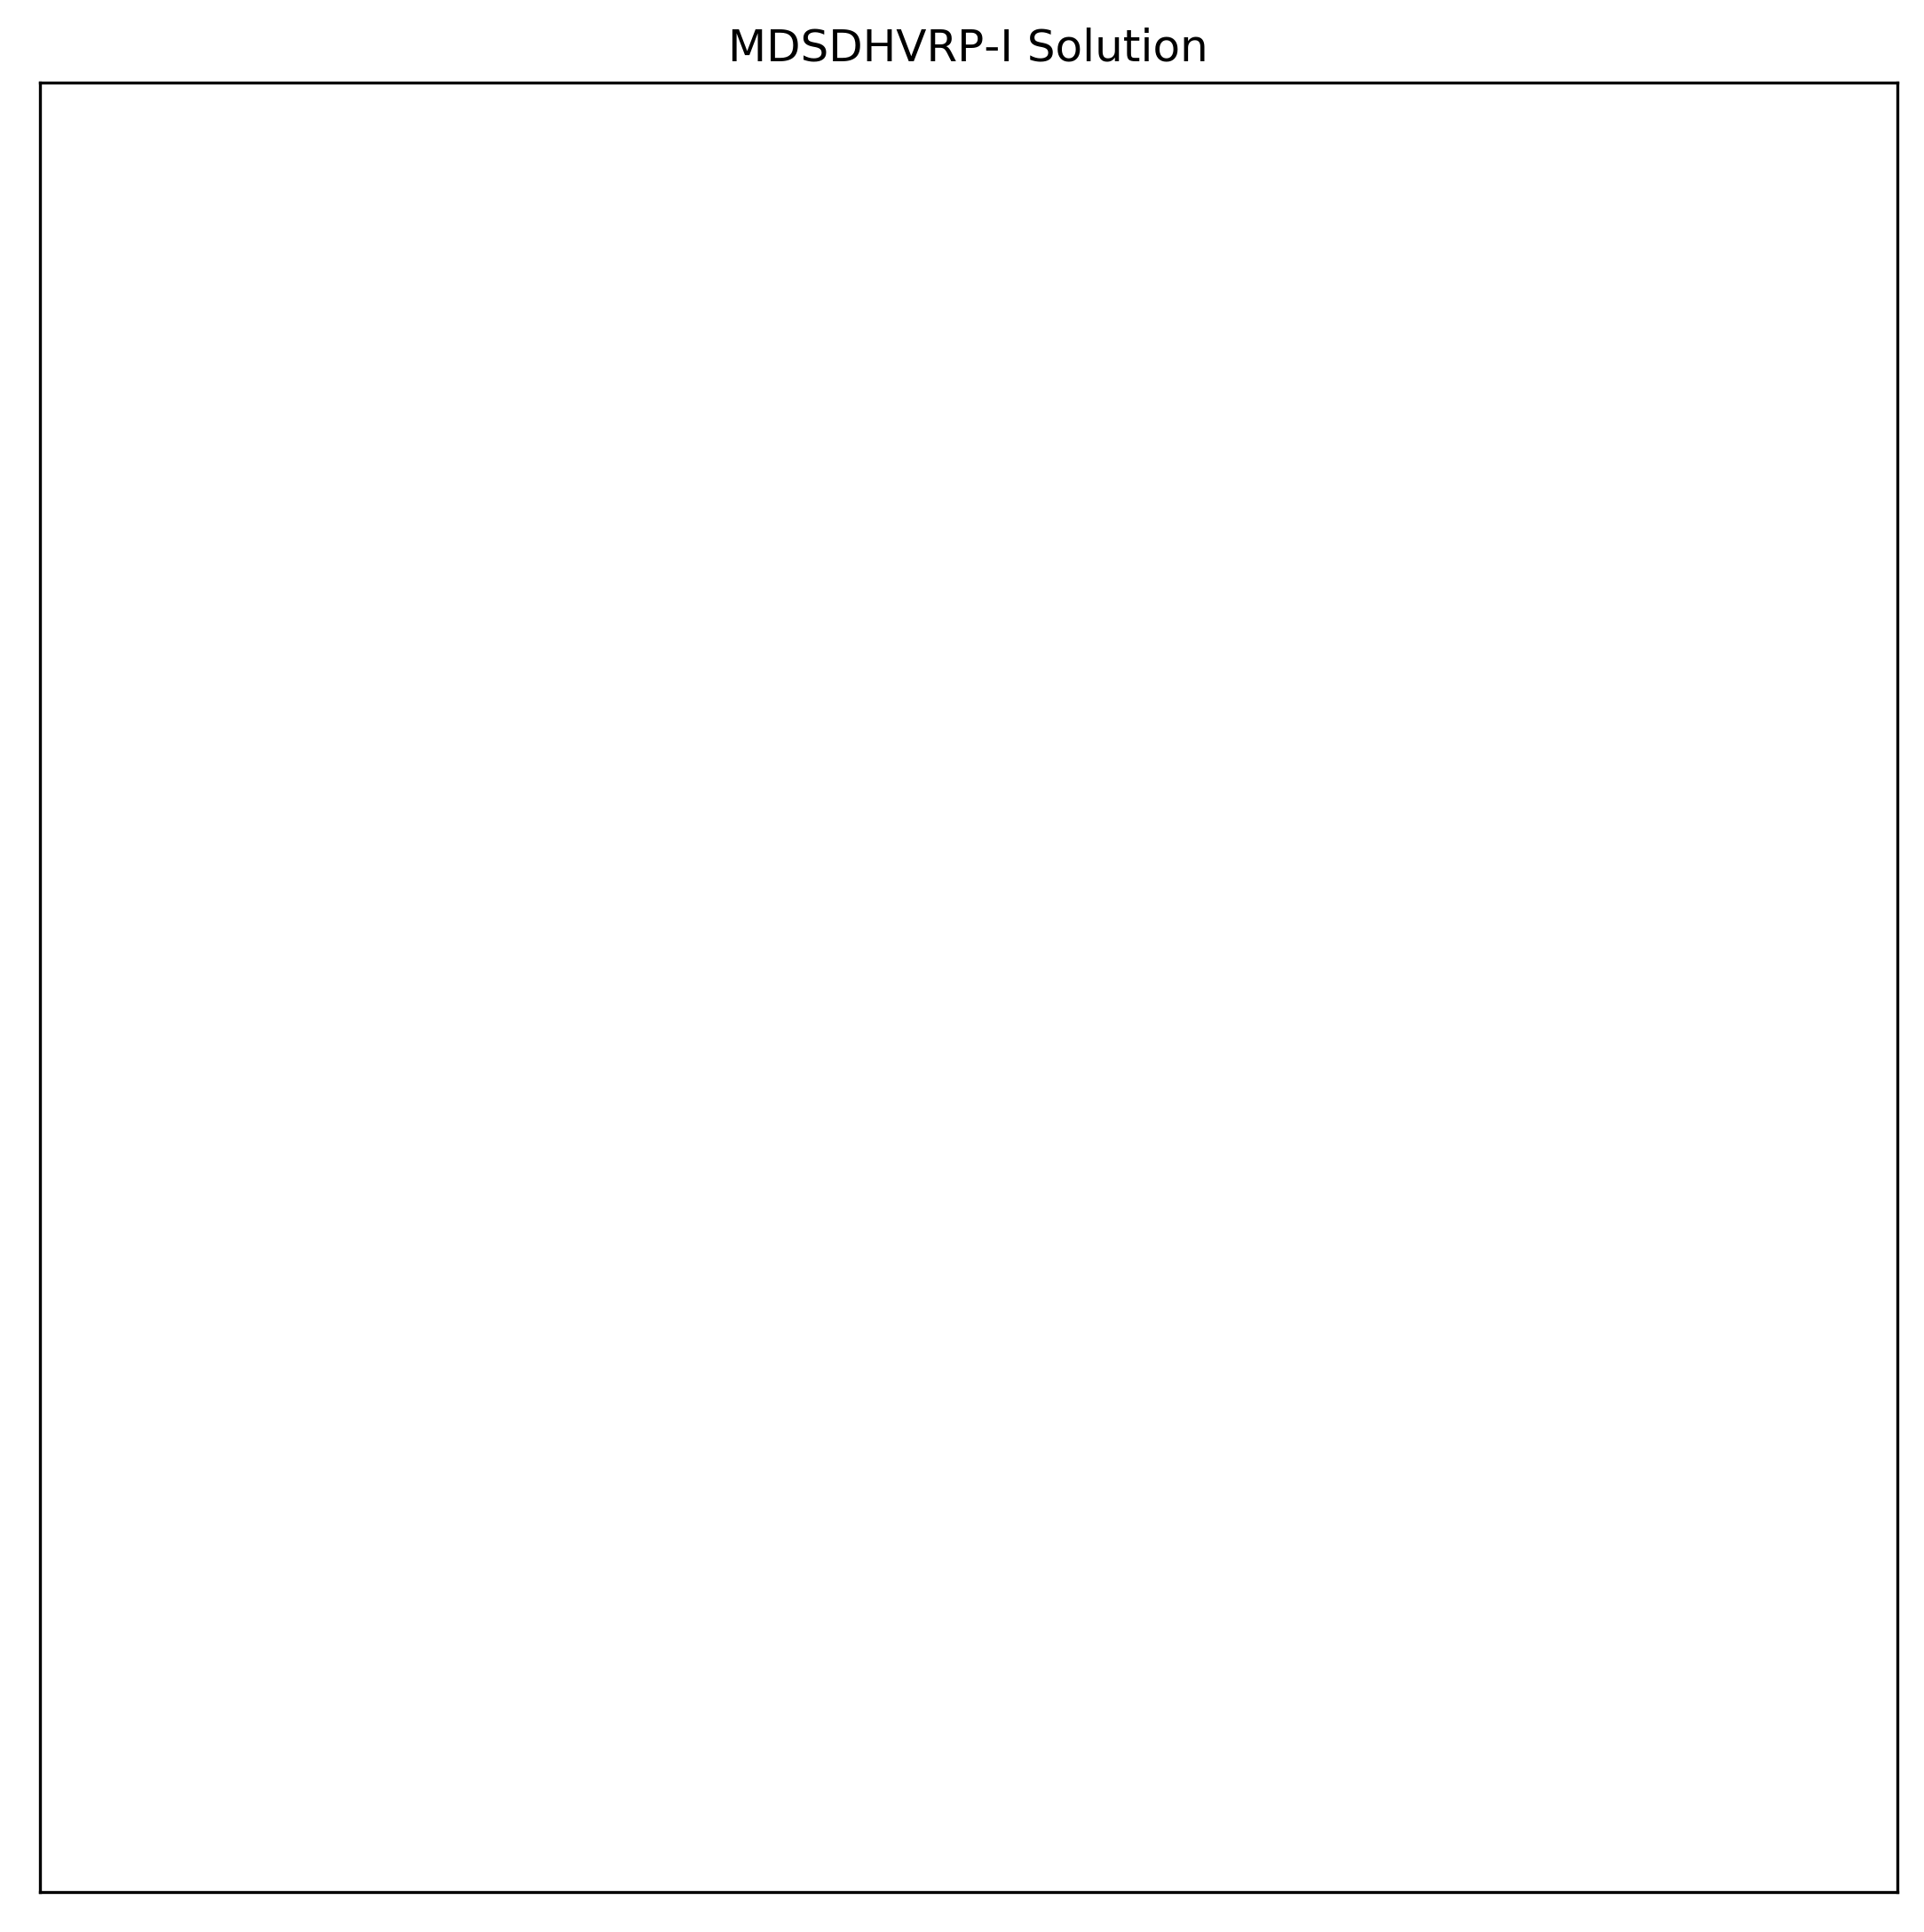

In [6]:
# create empty figure
fig, ax = plt.subplots(figsize=(9, 9), dpi=300)

# all x and y coordinates lay in interval [-100, 100]
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)

# remove ticks
ax.set_xticks([])
ax.set_yticks([])

# add title
ax.set_title("MDSDHVRP-I Solution")

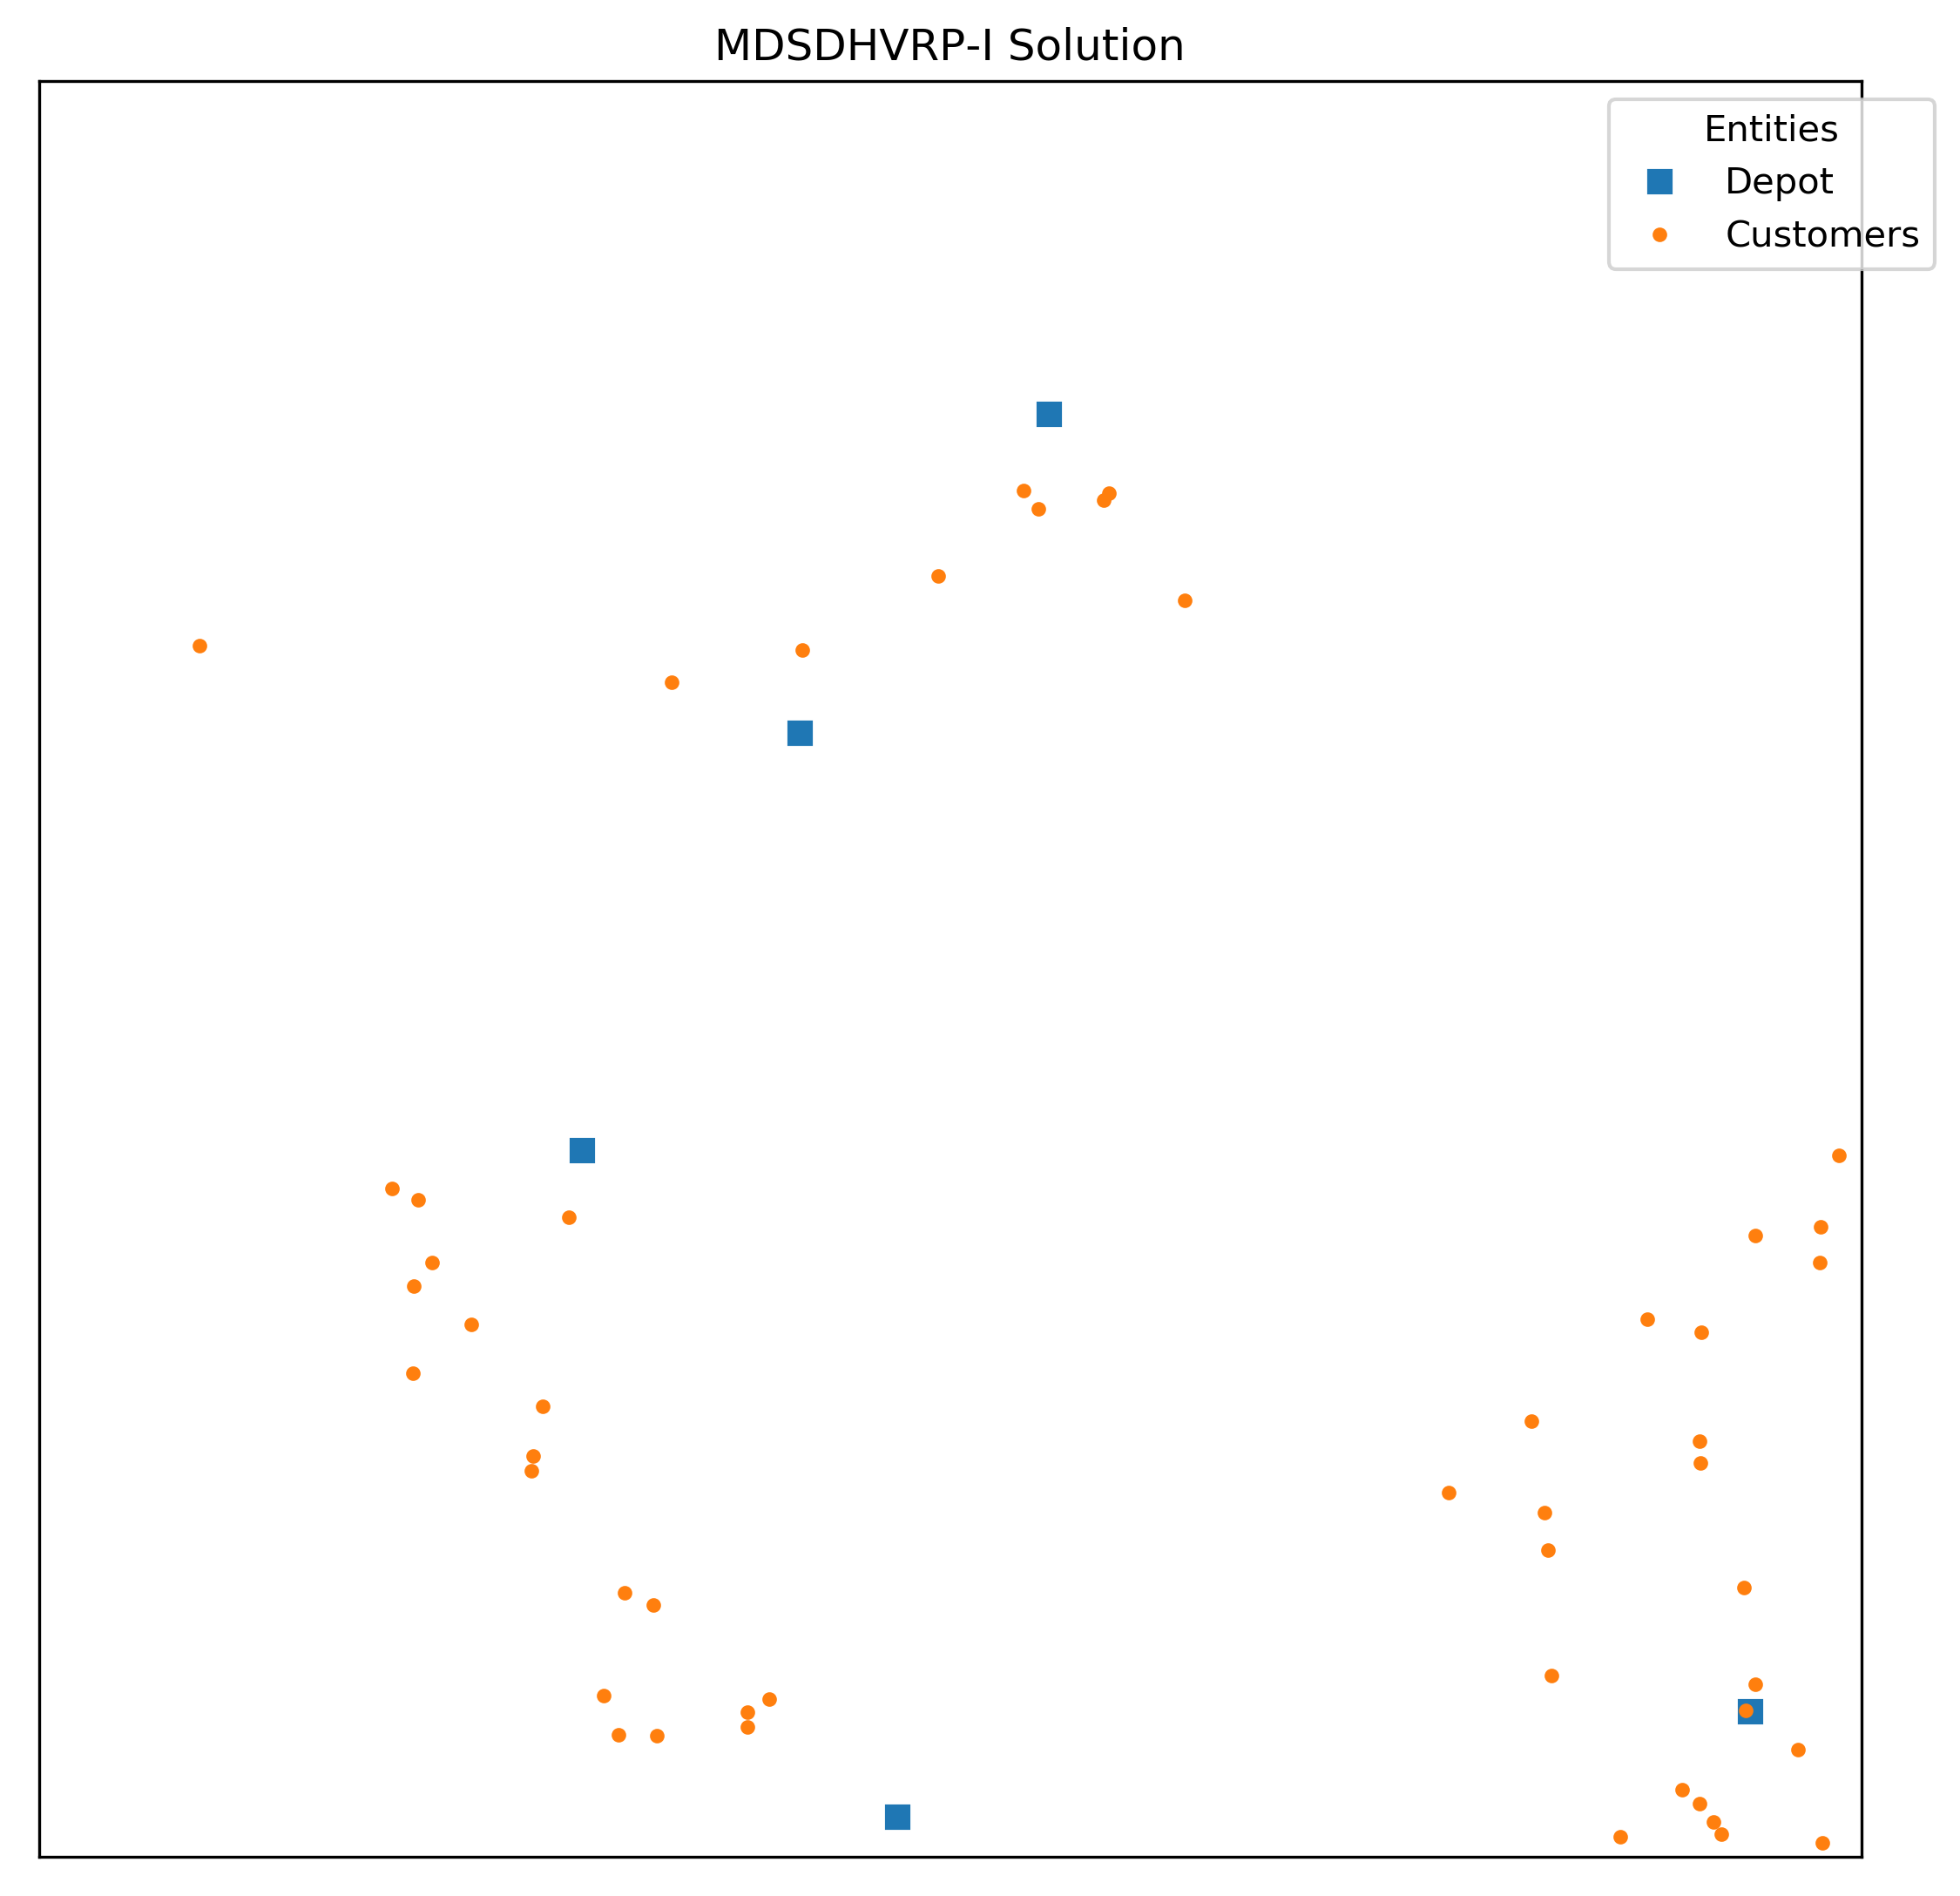

In [7]:
df_depots = pd.DataFrame(depots)
df_customers = pd.DataFrame(customers)

# plot depots
plot_depots, = ax.plot(df_depots.x_coord.values, df_depots.y_coord.values, ls="", marker="s", label="Depot")

# plot customers
plot_customers, = ax.plot(df_customers.x_coord.values, df_customers.y_coord.values, ls="", marker=".", label="Customers")

# create legend and plot
entity_legend = ax.legend(handles=[plot_depots, plot_customers], bbox_to_anchor=(1.05, 1), title="Entities")

fig

### Add Trip

Adding routes is not as straight-forward as adding the depots and customers. A route only provides the customer ids and the depot it came from but a route should be a collection of coordinates. Let's create a routine to do this

In [8]:
def get_trip_coordinates(trip, depots, customers):
    # define an empty trip coordinates list
    trip_path = []
    
    # if we have no customers we return an empty trip_path
    if len(trip["customers"]) == 0:
        return trip_path
    
    # start location of the trip is the depot
    trip_path.append({
        'x': depots[trip["depot_id"]]["x_coord"],
        'y': depots[trip["depot_id"]]["y_coord"]
    })
    
    # get coordinates of all customers
    for customer in trip["customers"]:
        trip_path.append({
            'x': customers[customer["id"]]["x_coord"],
            'y': customers[customer["id"]]["y_coord"]
        })
    
    # lastly, we go back to the depot again
    trip_path.append({
        'x': depots[trip["depot_id"]]["x_coord"],
        'y': depots[trip["depot_id"]]["y_coord"]
    })
    
    return trip_path

Now that we can obtain all coordinates we can simply add the paths as regular line plots.

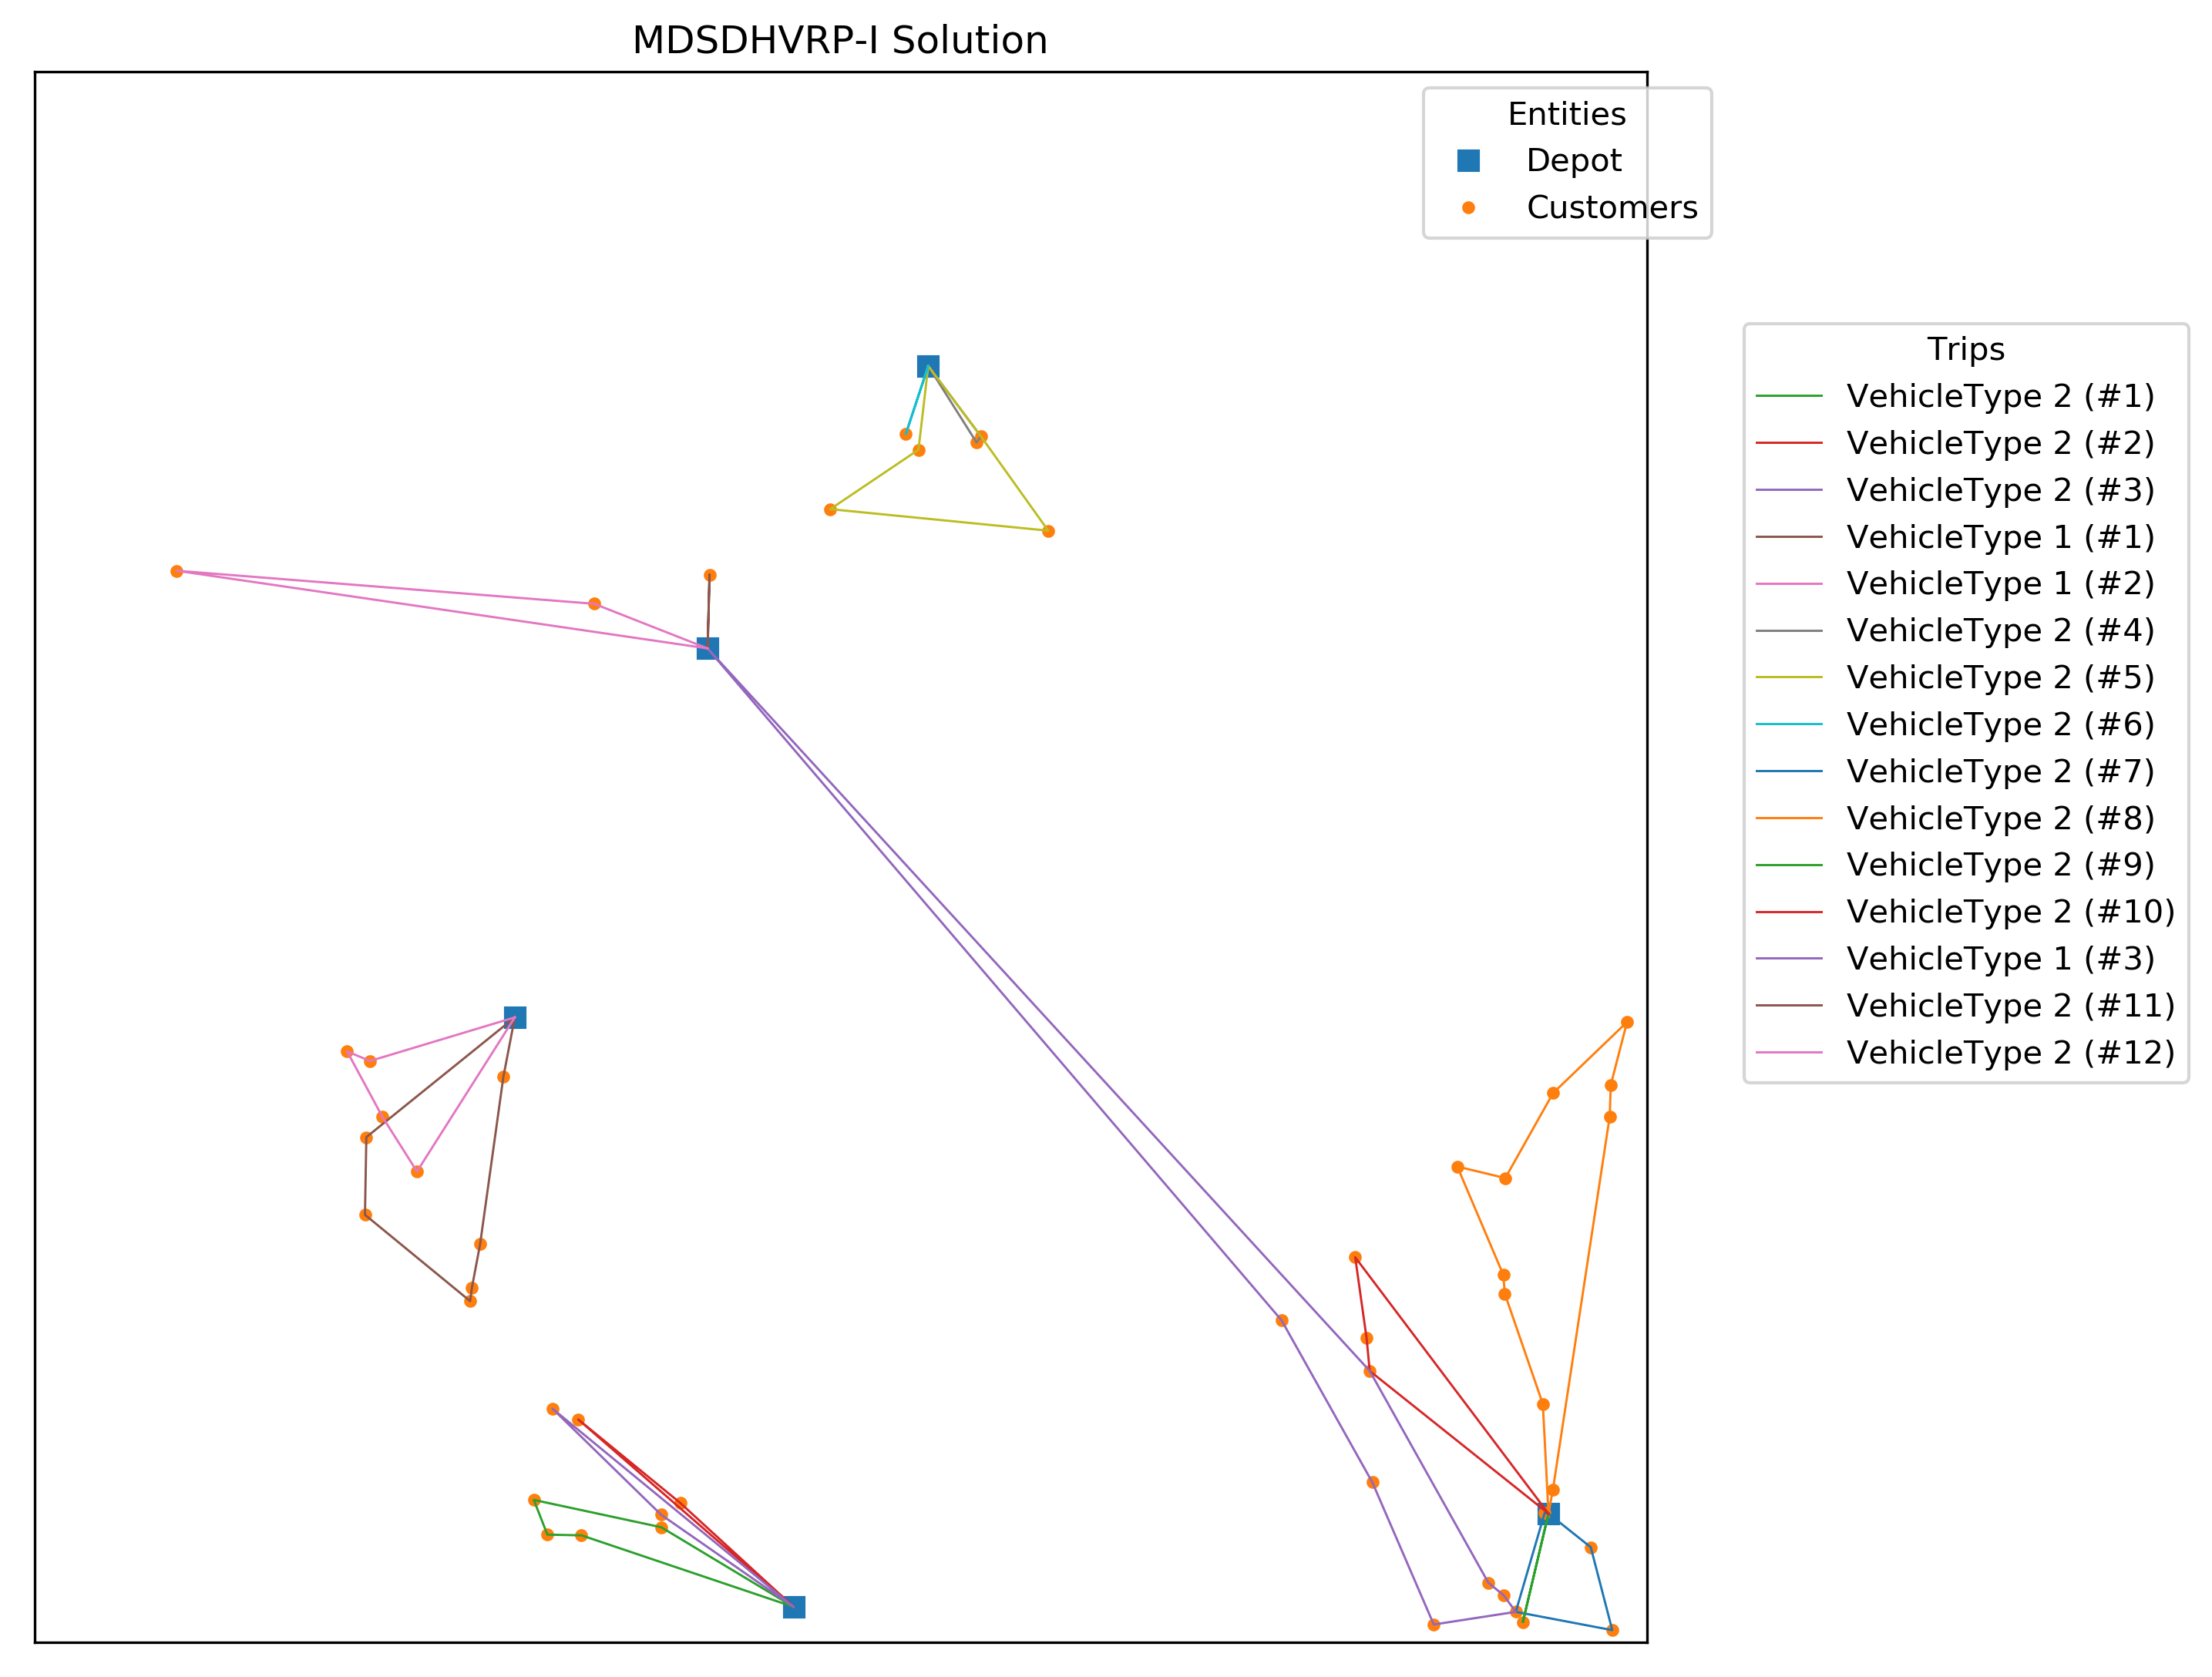

In [9]:
# map to check how many vehicles of certain type go on a trip for the figure
n_vehicles = defaultdict(int)
plot_lines = []

for trip in trips:
    # get path
    trip_path = get_trip_coordinates(trip, depots, customers)
    
    # if trip exists, put in dataframe and plot
    if len(trip_path) > 0:
        # create dataframe and increase number of vehicles of this type
        df_trip = pd.DataFrame(trip_path)
        n_vehicles[trip['vehicle_type']] += 1
        plot_line, = ax.plot(df_trip.x, df_trip.y, linewidth=0.7, label=f"VehicleType {trip['vehicle_type']} (#{n_vehicles[trip['vehicle_type']]})")
        plot_lines.append(plot_line)

# add extra legend for all trips and original one
fig.gca().add_artist(entity_legend)
ax.legend(handles=plot_lines, bbox_to_anchor=(1.05, 0.85), title="Trips")

fig

## Conclusion

In this article we explored how we can plot basic vehicle routing problem solutions using **matplotlib** in Python. 